In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install tick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.4 MB/s eta 0:00:0000:0100:01
  Using cached sphinx-5.3.0-py3-none-any.whl (3.2 MB)
  Using cached numpydoc-1.5.0-py3-none-any.whl (52 kB)
  Using cached sphinxcontrib_devhelp-1.0.2-py2.py3-none-any.whl (84 kB)
  Using cached sphinxcontrib_htmlhelp-2.0.0-py2.py3-none-any.whl (100 kB)
  Using cached alabaster-0.7.13-py3-none-any.whl (13 kB)
  Using cached sphinxcontrib_jsmath-1.0.1-py2.py3-none-any.whl (5.1 kB)
  Using cached sphinxcontrib_serializinghtml-1.1.5-py2.py3-none-any.whl (94 kB)
  Using cached imagesize-1.4.1-py2.py3-none-any.whl (8.8 kB)
  Using cached sphinxcontrib_qthelp-1.0.3-py2.py3-none-any.whl (90 kB)
  Using cached sphinxcontrib_applehelp-1.0.2-py2.py3-none-any.whl (121 kB)


In [4]:
import tick

In [25]:
!pip install googledrivedownloader

In [26]:
!pip install pickle-mixin --upgrade

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6006 sha256=b8d11b8333eefcff4bf03978d201b8ff434965fe0e7cafb3d3ce0bc7dddb5f7a
  Stored in directory: /root/.cache/pip/wheels/84/1d/8e/f937d079240be6eebd65315d7df5e62a106e3f4aa7060e3390
Successfully built pickle-mixin


Домашнее задание I

Задание 1

In [20]:
from tick.hawkes import SimuPoissonProcess
from tick.plot import plot_point_process
import numpy as np
from tick.base import TimeFunction
from tick.plot import plot_point_process
from tick.hawkes import SimuInhomogeneousPoisson
from tqdm import tqdm_notebook
from tick.plot import plot_point_process
from tick.base import TimeFunction
from tick.hawkes import SimuHawkes, HawkesKernelSumExp, HawkesKernelExp,HawkesKernel0,HawkesKernelTimeFunc
import matplotlib.pyplot as plt

In [7]:
C = 0
run_time = 10


h_poisson_data_set=[]

for i in range(2000):
    simul_list = []
    for C in range(5):
        intensity = 10/ (C + 1)
        poi = SimuPoissonProcess(intensity, end_time=run_time, verbose=False)
        poi.simulate()
        simul_list.append(poi.timestamps[0])
    h_poisson_data_set.append(simul_list)

In [10]:
h_poisson_data_set[:2]

[[array([0.03484783, 0.14231849, 0.36438616, 0.61074054, 0.65690601,
         0.73995136, 0.76856452, 0.8044123 , 0.85468459, 0.87703191,
         0.95079509, 1.06728719, 1.28533782, 1.32465216, 1.40569282,
         1.48332572, 1.51608106, 1.62868629, 1.64865229, 1.71110369,
         1.71857385, 1.72771046, 1.88205605, 2.15074714, 2.25952064,
         2.34495629, 2.41446087, 2.48398929, 2.67144879, 2.6752621 ,
         2.98120491, 3.18242188, 3.41659243, 3.84032687, 3.87082001,
         3.91732555, 3.97515122, 3.98420839, 4.06301043, 4.29333442,
         4.34324175, 4.51308232, 4.52060424, 4.89340245, 5.17536726,
         5.17802113, 5.19248532, 5.25319519, 5.30131622, 5.38743741,
         5.44942509, 5.53799107, 5.54462636, 5.78001543, 5.80780967,
         5.95663669, 6.1195479 , 6.14026844, 6.16527309, 6.36296352,
         6.46514091, 6.61959221, 6.65402485, 6.70479387, 6.81696682,
         6.97351021, 7.02745807, 7.07257306, 7.26972577, 7.58973009,
         7.66117899, 7.80464278, 8

In [11]:
h_poisson_data_set[0]

[array([0.03484783, 0.14231849, 0.36438616, 0.61074054, 0.65690601,
        0.73995136, 0.76856452, 0.8044123 , 0.85468459, 0.87703191,
        0.95079509, 1.06728719, 1.28533782, 1.32465216, 1.40569282,
        1.48332572, 1.51608106, 1.62868629, 1.64865229, 1.71110369,
        1.71857385, 1.72771046, 1.88205605, 2.15074714, 2.25952064,
        2.34495629, 2.41446087, 2.48398929, 2.67144879, 2.6752621 ,
        2.98120491, 3.18242188, 3.41659243, 3.84032687, 3.87082001,
        3.91732555, 3.97515122, 3.98420839, 4.06301043, 4.29333442,
        4.34324175, 4.51308232, 4.52060424, 4.89340245, 5.17536726,
        5.17802113, 5.19248532, 5.25319519, 5.30131622, 5.38743741,
        5.44942509, 5.53799107, 5.54462636, 5.78001543, 5.80780967,
        5.95663669, 6.1195479 , 6.14026844, 6.16527309, 6.36296352,
        6.46514091, 6.61959221, 6.65402485, 6.70479387, 6.81696682,
        6.97351021, 7.02745807, 7.07257306, 7.26972577, 7.58973009,
        7.66117899, 7.80464278, 8.16435903, 8.22

- Создайте набор данных неоднородного процесса Пуассона с $\lambda_c(t) = 10 e^{-\frac{0.2}{c+1}t} (1+sin(5t))/(c+1)$ , где $c \in\{0,1,2,3,4\}$ — тип события. Максимальное время $T = 10$. Вы можете сделать это вручную или с помощью библиотеки тиков.

In [13]:
run_time = 10
i_poisson_data_set=[]

for i in range(2000):
    simul_list = []
    for C in range(5):
 
        T = np.arange((run_time * 0.9) * 5, dtype=float) / 5
        Y = 10 * np.exp(-(0.2)/(C+1)*T) * (1 + np.sin(5*T)) / (C+1)

        tf = TimeFunction((T, Y), dt=0.01)


        in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)

        in_poi.track_intensity(0.1)
        in_poi.simulate()

        simul_list.append(in_poi.timestamps[0])
    i_poisson_data_set.append(simul_list)

In [17]:
len(i_poisson_data_set)

2000

In [18]:
i_poisson_data_set[:2]

[[array([0.11077712, 0.12479452, 0.27591261, 0.31068581, 0.34515749,
         0.38483914, 0.38494316, 0.42061417, 0.42663535, 0.43492433,
         0.49453147, 0.59508856, 0.83851129, 1.23557252, 1.24865785,
         1.39090707, 1.39215876, 1.46606533, 1.92212581, 1.9906759 ,
         2.11720445, 2.68589402, 2.77032125, 2.85095286, 2.98064037,
         3.8124812 , 4.08348892, 4.14299651, 4.22289402, 4.23097411,
         4.37512093, 4.39100418, 4.40001491, 4.42429347, 5.07046635,
         5.2388982 , 5.52805176, 5.5688711 , 5.66029223, 6.84607336,
         7.42244963, 7.67427838, 7.69519697, 7.93237331]),
  array([0.12183186, 0.4452372 , 0.47960203, 0.49890544, 1.42261298,
         1.5008119 , 1.56798294, 1.61837244, 1.77524822, 1.96490409,
         2.63692791, 2.93097442, 3.8555481 , 4.21087984, 4.24106692,
         4.89514163, 5.13226615, 5.59946424, 6.26678913, 6.53746746,
         6.81863871, 7.79167876, 7.79206027]),
  array([0.23096114, 0.24706366, 0.30289887, 0.4709153 , 1.2448038

In [19]:
i_poisson_data_set[0]

[array([0.11077712, 0.12479452, 0.27591261, 0.31068581, 0.34515749,
        0.38483914, 0.38494316, 0.42061417, 0.42663535, 0.43492433,
        0.49453147, 0.59508856, 0.83851129, 1.23557252, 1.24865785,
        1.39090707, 1.39215876, 1.46606533, 1.92212581, 1.9906759 ,
        2.11720445, 2.68589402, 2.77032125, 2.85095286, 2.98064037,
        3.8124812 , 4.08348892, 4.14299651, 4.22289402, 4.23097411,
        4.37512093, 4.39100418, 4.40001491, 4.42429347, 5.07046635,
        5.2388982 , 5.52805176, 5.5688711 , 5.66029223, 6.84607336,
        7.42244963, 7.67427838, 7.69519697, 7.93237331]),
 array([0.12183186, 0.4452372 , 0.47960203, 0.49890544, 1.42261298,
        1.5008119 , 1.56798294, 1.61837244, 1.77524822, 1.96490409,
        2.63692791, 2.93097442, 3.8555481 , 4.21087984, 4.24106692,
        4.89514163, 5.13226615, 5.59946424, 6.26678913, 6.53746746,
        6.81863871, 7.79167876, 7.79206027]),
 array([0.23096114, 0.24706366, 0.30289887, 0.4709153 , 1.24480384,
        1.27

- Сгенерируйте процесс Хоукса с 5 типами событий $c\in\{0,1,2,3,4\}$ и максимальным временем $T=10$:
   - Базовая интенсивность: $\mu_{c} = \frac{5}{c+1}$
   - Ядра:
    - $\phi_{0,j} = 0.1^j((j + 0.1) * 10 + t)^{-2^{1/(j+1)}}$
    - $i \in \{1,2,3\}$: $\phi_{i,j} = \sum_{d = 1}^{3} 0.1^{i+j+d} 2^{d/(j+1)}\exp(-2^{d/(j+1)} t)$
    - $j\in\{0,1,2,3\}$: $\phi_{4,j} = 0.5^{1/(j+1)}*(1+sin(5^{1/(j+1)}t))$
    - $\phi_{4,4} = 0$

In [24]:
run_time = 10

hawkes_data_set = []

for i in tqdm_notebook(range(2000)):
    mu_list=[]
    for j in range(5):
        mu_list.append(5/(j+1))


    hawkes = SimuHawkes(baseline=mu_list, end_time=run_time, verbose=False)


    for i in range(5):
        for j in range(5):
            if i == 0:
                T =  np.arange((run_time * 0.9) * 5, dtype=np.float64) / 5
                Y = np.power(0.1,j)*np.power(((j+0.1) * 10 + T),-np.power(2, 1/(j+1)))
                if np.isnan(Y).sum():
                    print(i,j,Y)
                tf_ij = TimeFunction([T, Y], dt=0.01)                               
                kernel_ij = HawkesKernelTimeFunc(tf_ij)
                hawkes.set_kernel(0, j, kernel_ij)
            elif i==4 and j in (0,1,2,3):
                T =  np.arange((run_time * 0.9) * 5, dtype=np.float64) / 5
                Y = np.power(1/2, 1/(j+1))*(1 + np.sin(np.power(5, 1/(j+1))*T))
                tf_ij = TimeFunction([T, Y], dt=0.01)    
                kernel_ij = HawkesKernelTimeFunc(tf_ij)
                hawkes.set_kernel(4, j, kernel_ij)
            elif i in (1,2,3):
                T =  np.arange((run_time * 0.9) * 5, dtype=np.float64) / 5
                Y = np.sum([np.power(0.1, i+j+d)*np.power(2, d/(j+1))*\
                            np.exp(-np.power(2, d/(j+1))*T) for d \
                            in (1,2,3)], axis=0)
                tf_ij = TimeFunction([T, Y], dt=0.01)                               
                kernel_ij = HawkesKernelTimeFunc(tf_ij)
                hawkes.set_kernel(i, j, kernel_ij)
            else:
                hawkes.set_kernel(4, 4, HawkesKernel0())
    dt = 0.1
    hawkes.track_intensity(dt)
    hawkes.simulate()
    hawkes_data_set.append(hawkes.timestamps)   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/2000 [00:00<?, ?it/s]

In [22]:
len(hawkes_data_set)

In [ ]:
hawkes_data_set[0]

Загрузка реальных данных

### Набор данных ретвитов
####!unzip amz7k.zip -d . Набор данных с историей ретвитов 3 категорий пользователей как тип события.

In [27]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1q1VUY3VTmaZqT8VjWY5hKrSx8v9tZbt7',
                                    dest_path='./train_tick.pkl')

In [36]:
!unzip amz7k.zip -d .

Archive:  amz7k.zip
   creating: ./amz7k/
  inflating: ./amz7k/6966.csv        
  inflating: ./amz7k/545.csv         
  inflating: ./amz7k/223.csv         
  inflating: ./amz7k/4817.csv        
  inflating: ./amz7k/4803.csv        
  inflating: ./amz7k/237.csv         
  inflating: ./amz7k/6972.csv        
  inflating: ./amz7k/551.csv         
  inflating: ./amz7k/6782.csv        
  inflating: ./amz7k/579.csv         
  inflating: ./amz7k/3822.csv        
  inflating: ./amz7k/4195.csv        
  inflating: ./amz7k/2282.csv        
  inflating: ./amz7k/1953.csv        
  inflating: ./amz7k/1947.csv        
  inflating: ./amz7k/3188.csv        
  inflating: ./amz7k/2296.csv        
  inflating: ./amz7k/3836.csv        
  inflating: ./amz7k/4181.csv        
  inflating: ./amz7k/7488.csv        
  inflating: ./amz7k/6796.csv        
  inflating: ./amz7k/586.csv         
  inflating: ./amz7k/1012.csv        
  inflating: ./amz7k/7463.csv        
  inflating: ./amz7k/3605.csv        
  inflat

In [28]:
import pickle

with open('./train_tick.pkl', 'rb') as f:
    tweets_dset = pickle.load(f)

In [29]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1nlp2wQAPrNHst7to0vkkz9uHyI4d1-xU',
                                    dest_path='./amz7k.zip')

In [34]:
from typing import List
import os
import tqdm
import torch
import pandas as pd

def load_data(
    path_to_data: str,
    n_types: int,
    return_times = False
    ) -> List[torch.Tensor]:
    files = os.listdir(path_to_data)
    seqs = []
    if 'clusters.csv' in files:
        files.remove('clusters.csv')
    for i, f in tqdm.tqdm(enumerate(files)):
        df = pd.read_csv(path_to_data + '/' + f)
        df = df.sort_values(by=['time'])
        seq = torch.zeros(len(df['time']), n_types + 1)
        for id_, (time, event) in enumerate(zip(list(df['time']), list(df['event']))):
            seq[id_,0] = time
            seq[id_, int(event) + 1] = 1
        if return_times:
            seq[1:, 0] -= seq[:-1, 0]
            seq[0, 0] = 0
        else:
            seq[:,0]-=seq[0,0].clone()
        seq[:,0]/=86400 # the input is in unix time
        seqs.append(seq)
    return seqs

In [ ]:
data = load_data('amz7k', 8)

3890it [00:10, 370.43it/s]

In [48]:
data[0].shape

torch.Size([25, 9])

In [49]:
n_types = 8
N = len(data)
print(N)

7523


In [51]:
def torch_tensor_to_tick(data, n_types):
    dset = []
    for seq in data:
        tick_seq = []
        for i in range(n_types):
            tweets_dset[0]
            tick_seq.append(seq[seq[:,i+1] == 1, 0].numpy())
        dset.append(tick_seq)
    return dset

In [52]:
amazon_dset = torch_tensor_to_tick(data, n_types)

In [54]:
amazon_dset[0]

[array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([  29.,   38.,  894.,  937.,  975.,  975.,  975.,  993., 1130.,
        1567., 1778., 1785.], dtype=float32),
 array([  0.,  41., 320., 391., 391., 693., 693., 850.], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([ 999., 1220., 1319., 1344., 1344.], dtype=float32)]

## Вопрос

Какого поведения вы ожидаете от ретвитов и наборов данных Amazon?

Ответ:
Для того, чтобы получить ретвиты, необходимо использовать процесс Хоукса - это процесс, в котором точки генерируются самовозбуждающимся неоднородным способом. В отличие от этого, для Амазона более подходящим будет неоднородный пуассоновский процесс.

Заданиие 2

In [55]:
amazon_dset[0]

[array([], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([  29.,   38.,  894.,  937.,  975.,  975.,  975.,  993., 1130.,
        1567., 1778., 1785.], dtype=float32),
 array([  0.,  41., 320., 391., 391., 693., 693., 850.], dtype=float32),
 array([], dtype=float32),
 array([], dtype=float32),
 array([ 999., 1220., 1319., 1344., 1344.], dtype=float32)]

In [56]:
tweets_dset[0]

[array([ 23.,  28.,  30.,  32.,  33.,  34.,  36.,  39.,  40.,  43.,  44.,
         48.,  52.,  54.,  55.,  56.,  58.,  59.,  60.,  61.,  74.,  75.,
         77.,  79.,  80.,  81.,  87.,  88.,  89.,  92.,  94.,  95., 111.,
        113., 119., 165., 166., 170., 177., 196., 199., 201., 203., 206.,
        208., 211., 215., 217., 219., 220., 225., 232., 234., 235., 239.,
        241., 243., 246., 248., 254., 255., 259., 695.]),
 array([1.5000e+01, 1.6000e+01, 1.9000e+01, 2.3000e+01, 2.5000e+01,
        4.6000e+01, 5.7000e+01, 8.6000e+01, 9.0000e+01, 1.1700e+02,
        1.5700e+02, 1.6200e+02, 1.7100e+02, 1.9100e+02, 1.9500e+02,
        1.9800e+02, 2.5700e+02, 2.6300e+02, 3.1800e+02, 4.6000e+02,
        5.9100e+02, 9.0000e+02, 3.9225e+04, 3.9270e+04, 3.9328e+04]),
 array([], dtype=float64)]

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Пуассоновский процесс

In [58]:
h_poisson_data_set[0]

[array([0.03484783, 0.14231849, 0.36438616, 0.61074054, 0.65690601,
        0.73995136, 0.76856452, 0.8044123 , 0.85468459, 0.87703191,
        0.95079509, 1.06728719, 1.28533782, 1.32465216, 1.40569282,
        1.48332572, 1.51608106, 1.62868629, 1.64865229, 1.71110369,
        1.71857385, 1.72771046, 1.88205605, 2.15074714, 2.25952064,
        2.34495629, 2.41446087, 2.48398929, 2.67144879, 2.6752621 ,
        2.98120491, 3.18242188, 3.41659243, 3.84032687, 3.87082001,
        3.91732555, 3.97515122, 3.98420839, 4.06301043, 4.29333442,
        4.34324175, 4.51308232, 4.52060424, 4.89340245, 5.17536726,
        5.17802113, 5.19248532, 5.25319519, 5.30131622, 5.38743741,
        5.44942509, 5.53799107, 5.54462636, 5.78001543, 5.80780967,
        5.95663669, 6.1195479 , 6.14026844, 6.16527309, 6.36296352,
        6.46514091, 6.61959221, 6.65402485, 6.70479387, 6.81696682,
        6.97351021, 7.02745807, 7.07257306, 7.26972577, 7.58973009,
        7.66117899, 7.80464278, 8.16435903, 8.22

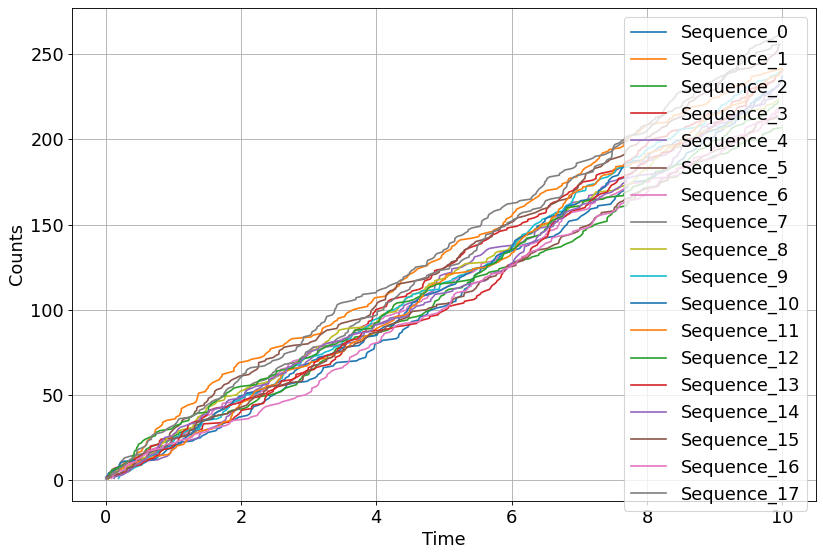

In [65]:
## - Функции подсчета для 50 последовательностей на одном графике, как вы можете объяснить различное поведение? 
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

for i in range(50):
    times = torch.from_numpy(np.concatenate(h_poisson_data_set[i])).sort().values
    counts = torch.Tensor([torch.sum(times <= t) for t in times])
    if i<18:
        ax.plot(times, counts, label=f'Sequence_{i}')

ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)
ax.grid(True)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1, 1))

plt.show()

Различное поведение проявляется из-за процессов разной интенсивности

### - Эмпирическую PDF для времени возврата без учета типа события и PDF однородного Пуассона в предположении, что этот набор данных является
### пуассоновским. Они близки? Какое поведение имеет эмпирическая PDF?


In [70]:
pred_lambda = sum([np.concatenate(i).shape[0] for i in h_poisson_data_set])/\
              sum([np.max(np.concatenate(i)) for i in h_poisson_data_set])

In [71]:
pred_lambda

22.969483556290683

In [72]:
all_times = torch.Tensor([])
for i in h_poisson_data_set:
    seq = torch.from_numpy(np.concatenate(i)).sort().values
    return_times = seq[1:] - seq[:-1]
    all_times = torch.cat((all_times, return_times), dim=0)

In [73]:
all_times.mean()

tensor(0.0435, dtype=torch.float64)

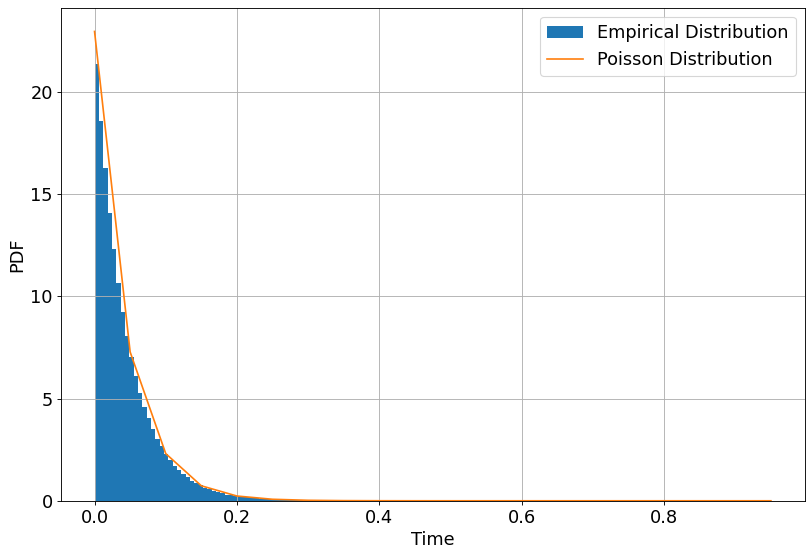

In [74]:
times = torch.arange(0, 1, 0.05)
pdf = lambda_pred * torch.exp(-lambda_pred * times)
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.hist(all_times, bins=100, density=True, label="Empirical Distribution")
ax.plot(times, pdf, label="Poisson Distribution")
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("PDF", fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

Это однородный пуассоновский процесс

### - Эмпирическую функция выживания, игнорирующую тип события, и функцию выживания однородного пуассона, предполагающую, что этот набор данных
### является пуассоновским.

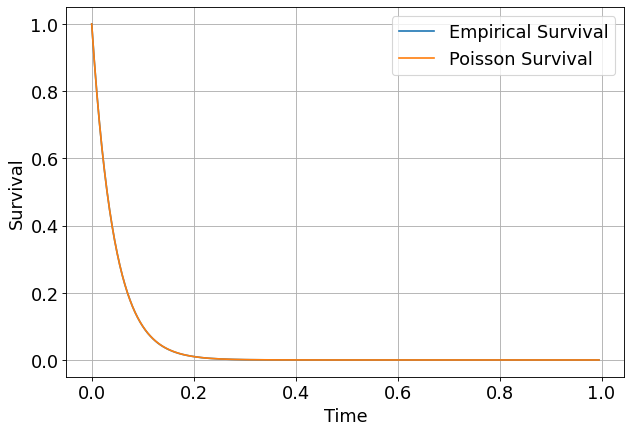

In [75]:
times = torch.arange(0, 1, 0.005)
survival = torch.Tensor([torch.sum(all_times > t) / (len(all_times) - 1) for t in times])
true_survival = torch.exp(-lambda_pred * times)

fig, ax = plt.subplots(figsize=(9, 6), dpi=80)
ax.plot(times, survival, label="Empirical Survival")
ax.plot(times, true_survival, label="Poisson Survival")
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1,1))
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Survival", fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.show()

In [77]:
## - Графики распределения типов событий.
all_len = np.sum([len(k) for i in h_poisson_data_set for k in i])
all_ratios = [ np.sum([len(i[k]) for i in h_poisson_data_set])/\
              all_len for k in range(len(h_poisson_data_set[0]))]

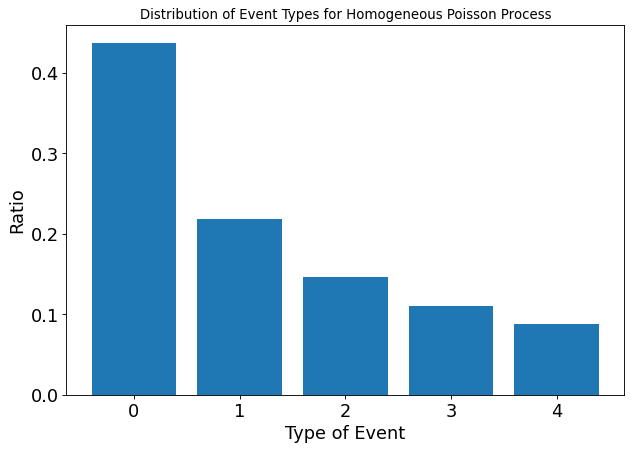

In [79]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=80)
ax.bar(list(range(len(h_poisson_data_set[0]))), all_ratios)
ax.set_title('Distribution of Event Types for Homogeneous Poisson Process')
ax.set_xlabel("Type of Event", fontsize=16)
ax.set_ylabel("Ratio", fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.show()

Ненородный пуассоновский процесс

In [80]:
i_poisson_data_set[0]

[array([0.11077712, 0.12479452, 0.27591261, 0.31068581, 0.34515749,
        0.38483914, 0.38494316, 0.42061417, 0.42663535, 0.43492433,
        0.49453147, 0.59508856, 0.83851129, 1.23557252, 1.24865785,
        1.39090707, 1.39215876, 1.46606533, 1.92212581, 1.9906759 ,
        2.11720445, 2.68589402, 2.77032125, 2.85095286, 2.98064037,
        3.8124812 , 4.08348892, 4.14299651, 4.22289402, 4.23097411,
        4.37512093, 4.39100418, 4.40001491, 4.42429347, 5.07046635,
        5.2388982 , 5.52805176, 5.5688711 , 5.66029223, 6.84607336,
        7.42244963, 7.67427838, 7.69519697, 7.93237331]),
 array([0.12183186, 0.4452372 , 0.47960203, 0.49890544, 1.42261298,
        1.5008119 , 1.56798294, 1.61837244, 1.77524822, 1.96490409,
        2.63692791, 2.93097442, 3.8555481 , 4.21087984, 4.24106692,
        4.89514163, 5.13226615, 5.59946424, 6.26678913, 6.53746746,
        6.81863871, 7.79167876, 7.79206027]),
 array([0.23096114, 0.24706366, 0.30289887, 0.4709153 , 1.24480384,
        1.27

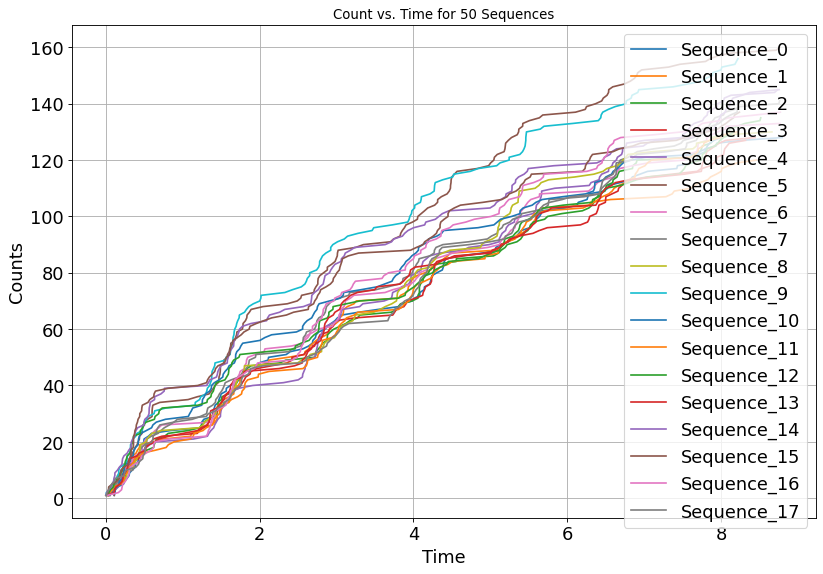

In [83]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

for i in range(50):
    times = torch.from_numpy(np.concatenate(i_poisson_data_set[i])).sort().values
    counts = torch.Tensor([torch.sum(times <= t) for t in times])
    if i<18:
        ax.plot(times, counts, label=f'Sequence_{i}')

ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)
ax.grid(True)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1, 1))

plt.title("Count vs. Time for 50 Sequences")
plt.show()

Различное поведение объясняется наличием процессов разной интенсивности, неоднородностью процесса

### - Эмпирическую PDF для времени возврата без учета типа события и PDF однородного Пуассона в предположении, что этот набор данных является
### пуассоновским. Они близки? Какое поведение имеет эмпирическая PDF?

In [85]:
pred = sum([np.concatenate(i).shape[0] for i in i_poisson_data_set])/sum([np.max(np.concatenate(i)) for i in i_poisson_data_set])

In [86]:
pred

14.913538520742218

In [89]:
all_times = torch.Tensor([])
for i in i_poisson_data_set:
    seq = torch.from_numpy(np.concatenate(i)).sort().values
    return_times = seq[1:] - seq[:-1]
    all_times = torch.cat((all_times, return_times), dim=0)

In [90]:
all_times.mean()

tensor(0.0673, dtype=torch.float64)

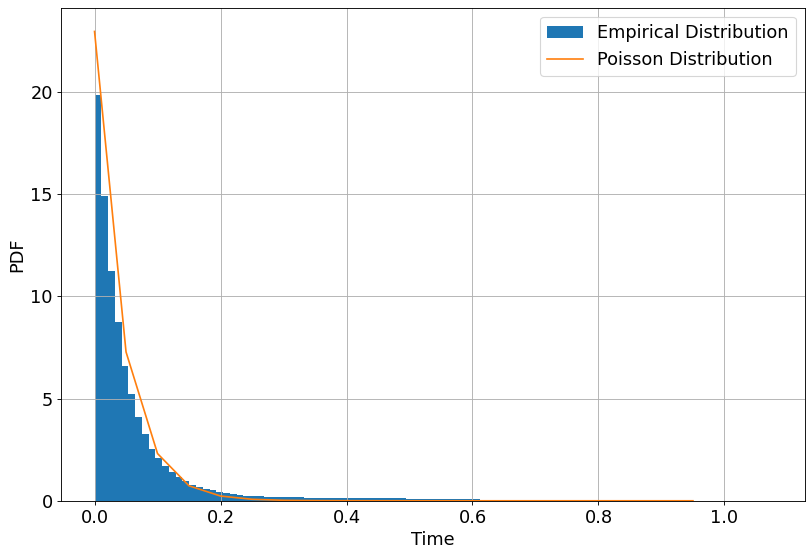

In [91]:
times = torch.arange(0, 1, 0.05)
pdf = lambda_pred * torch.exp(-lambda_pred * times)

fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.hist(all_times, bins=100, density=True, label="Empirical Distribution")
ax.plot(times, pdf, label="Poisson Distribution")
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1, 1))
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("PDF", fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.show()

In [93]:
#Однородный процесс

### - Эмпирическую функция выживания, игнорирующую тип события, и функцию выживания однородного пуассона, предполагающую, что этот набор данных
### является пуассоновским.

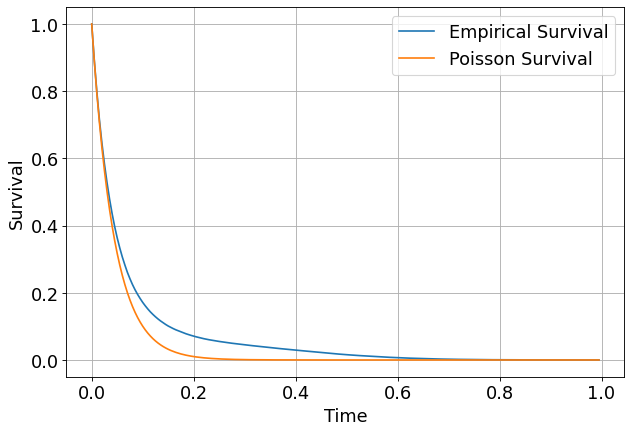

In [94]:
times = torch.arange(0, 1, 0.005)
survival = torch.Tensor([torch.sum(all_times > t) / (len(all_times) - 1) for t in times])
true_survival = torch.exp(-lambda_pred * times)

fig, ax = plt.subplots(figsize=(9, 6), dpi=80)
ax.plot(times, survival, label="Empirical Survival")
ax.plot(times, true_survival, label="Poisson Survival")
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1, 1))
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Survival", fontsize=16)
ax.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.show()

In [96]:
## - Графики распределения типов событий.
all_len = np.sum([len(k) for i in i_poisson_data_set for k in i])

In [98]:
all_ratios = [np.sum([len(i[k]) for i in i_poisson_data_set])/all_len for k in range(len(i_poisson_data_set[0]))]

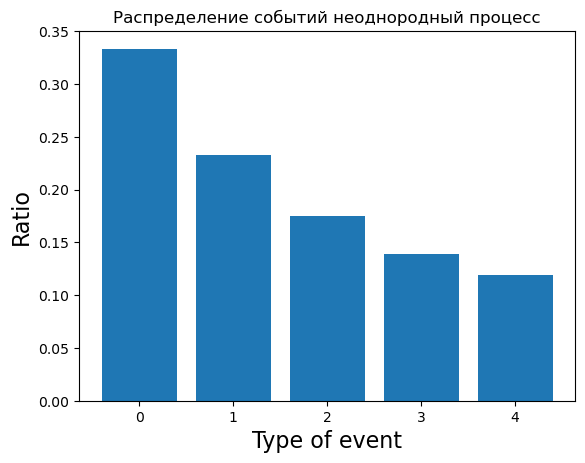

In [100]:
plt.bar(list(range(len(i_poisson_data_set[0]))), all_ratios)
plt.title('Распределение событий неоднородный процесс')
plt.xlabel("Type of event", fontsize=16)
plt.ylabel("Ratio", fontsize=16)
plt.show()

Процесс Хоукса

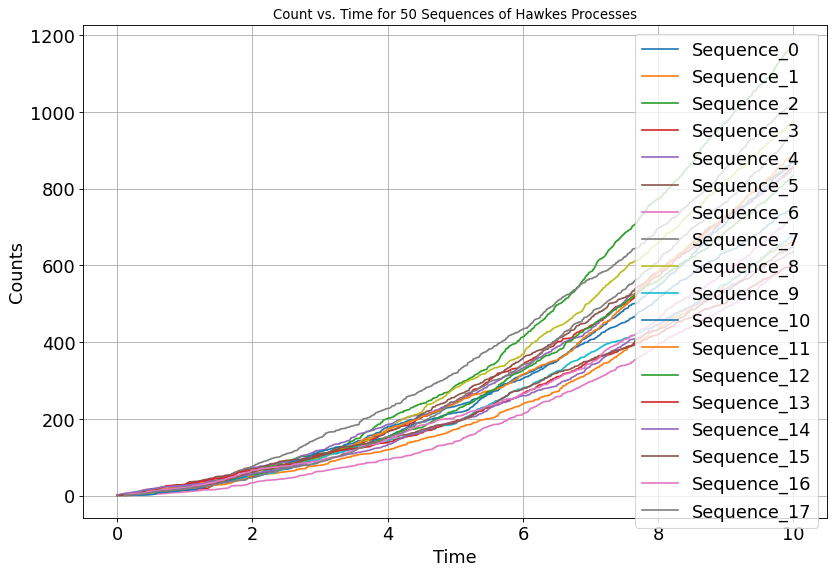

In [102]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

for i in range(50):
    times = torch.from_numpy(np.concatenate(hawkes_data_set[i])).sort().values
    counts = torch.Tensor([torch.sum(times <= t) for t in times])
    if i<18:
        ax.plot(times, counts, label=f'Sequence_{i}')

ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)
ax.grid(True)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc="upper right", bbox_to_anchor=(1, 1))

plt.title("Count vs. Time for 50 Sequences of Hawkes Processes")
plt.show()

Различное поведение можно объяснить наличием процессов разной интенсивности

In [105]:
pred_l = sum([np.concatenate(i).shape[0] for i in hawkes_data_set])/sum([np.max(np.concatenate(i)) for i in hawkes_data_set])

In [106]:
pred_l

84.39046003530868